# HW: X-ray images classification
--------------------------------------

Before you begin, open Mobaxterm and connect to triton with the user and password you were give with. Activate the environment `2ndPaper` and then type the command `pip install scikit-image`.

In this assignment you will be dealing with classification of 32X32 X-ray images of the chest. The image can be classified into one of four options: lungs (l), clavicles (c), and heart (h) and background (b). Even though those labels are dependent, we will treat this task as multiclass and not as multilabel. The dataset for this assignment is located on a shared folder on triton (`/MLdata/MLcourse/X_ray/'`).

In [1]:
import os
import numpy as np
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D, Dropout
from tensorflow.keras.layers import Flatten, InputLayer
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import *

from tensorflow.keras.initializers import Constant
from tensorflow.keras.datasets import fashion_mnist
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import *
from skimage.io import imread

from skimage.transform import rescale, resize, downscale_local_mean
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"]="2"

In [2]:
import tensorflow as tf
config = tf.compat.v1.ConfigProto(gpu_options =
                         tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.8)
# device_count = {'GPU': 1}
)
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(session)

In [3]:
def preprocess(datapath):
    # This part reads the images
    classes = ['b','c','l','h']
    imagelist = [fn for fn in os.listdir(datapath)]
    N = len(imagelist)
    num_classes = len(classes)
    images = np.zeros((N, 32, 32, 1))
    Y = np.zeros((N,num_classes))
    ii=0
    for fn in imagelist:

        src = imread(os.path.join(datapath, fn),1)
        img = resize(src,(32,32),order = 3)
        
        images[ii,:,:,0] = img
        cc = -1
        for cl in range(len(classes)):
            if fn[-5] == classes[cl]:
                cc = cl
        Y[ii,cc]=1
        ii += 1

    BaseImages = images
    BaseY = Y
    return BaseImages, BaseY

In [4]:
def preprocess_train_and_val(datapath):
    # This part reads the images
    classes = ['b','c','l','h']
    imagelist = [fn for fn in os.listdir(datapath)]
    N = len(imagelist)
    num_classes = len(classes)
    images = np.zeros((N, 32, 32, 1))
    Y = np.zeros((N,num_classes))
    ii=0
    for fn in imagelist:

        images[ii,:,:,0] = imread(os.path.join(datapath, fn),1)
        cc = -1
        for cl in range(len(classes)):
            if fn[-5] == classes[cl]:
                cc = cl
        Y[ii,cc]=1
        ii += 1

    return images, Y

In [5]:
#Loading the data for training and validation:
src_data = '/MLdata/MLcourse/X_ray/'
train_path = src_data + 'train'
val_path = src_data + 'validation'
test_path = src_data + 'test'
BaseX_train , BaseY_train = preprocess_train_and_val(train_path)
BaseX_val , BaseY_val = preprocess_train_and_val(val_path)
X_test, Y_test = preprocess(test_path)

In [ ]:
keras.backend.clear_session()

### PART 1: Fully connected layers 
--------------------------------------

---
<span style="color:red">***Task 1:***</span> *NN with fully connected layers. 

Elaborate a NN with 2 hidden fully connected layers with 300, 150 neurons and 4 neurons for classification. Use ReLU activation functions for the hidden layers and He_normal for initialization. Don't forget to flatten your image before feedforward to the first dense layer. Name the model `model_relu`.*

---

In [6]:
#--------------------------Impelment your code here:-------------------------------------
keras.backend.clear_session()

model_relu = Sequential(name="model_relu")
model_relu.add(Flatten(input_shape=(32,32,1)))

model_relu.add(Dense(300, kernel_initializer='he_normal'))
model_relu.add(Activation('relu', name='Relu_1'))                            

model_relu.add(Dense(150, kernel_initializer='he_normal'))
model_relu.add(Activation('relu', name='Relu_2'))

model_relu.add(Dense(4, kernel_initializer='he_normal'))
model_relu.add(Activation('softmax'))
#----------------------------------------------------------------------------------------

In [7]:
model_relu.summary()

Model: "model_relu"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               307500    
_________________________________________________________________
Relu_1 (Activation)          (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               45150     
_________________________________________________________________
Relu_2 (Activation)          (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 604       
_________________________________________________________________
activation (Activation)      (None, 4)                 0

In [8]:
#Inputs: 
input_shape = (32,32,1)
learn_rate = 1e-5
decay = 0
batch_size = 64
epochs = 25

#Define your optimizar parameters:
AdamOpt = Adam(lr=learn_rate,decay=decay)


Compile the model with the optimizer above, accuracy metric and adequate loss for multiclass task. Train your model on the training set and evaluate the model on the testing set. Print the accuracy and loss over the testing set.

Epoch 1/25
102/102 - 1s - loss: 1.3077 - accuracy: 0.4435 - val_loss: 1.2364 - val_accuracy: 0.4857
Epoch 2/25
102/102 - 1s - loss: 1.1325 - accuracy: 0.6114 - val_loss: 1.1272 - val_accuracy: 0.6057
Epoch 3/25
102/102 - 0s - loss: 1.0248 - accuracy: 0.6659 - val_loss: 1.0536 - val_accuracy: 0.6229
Epoch 4/25
102/102 - 0s - loss: 0.9552 - accuracy: 0.7034 - val_loss: 1.0013 - val_accuracy: 0.6229
Epoch 5/25
102/102 - 0s - loss: 0.9028 - accuracy: 0.7268 - val_loss: 0.9632 - val_accuracy: 0.6400
Epoch 6/25
102/102 - 0s - loss: 0.8622 - accuracy: 0.7444 - val_loss: 0.9302 - val_accuracy: 0.6686
Epoch 7/25
102/102 - 1s - loss: 0.8288 - accuracy: 0.7553 - val_loss: 0.9022 - val_accuracy: 0.6743
Epoch 8/25
102/102 - 1s - loss: 0.7987 - accuracy: 0.7665 - val_loss: 0.8841 - val_accuracy: 0.6743
Epoch 9/25
102/102 - 1s - loss: 0.7740 - accuracy: 0.7740 - val_loss: 0.8659 - val_accuracy: 0.6800
Epoch 10/25
102/102 - 1s - loss: 0.7497 - accuracy: 0.7825 - val_loss: 0.8510 - val_accuracy: 0.6686

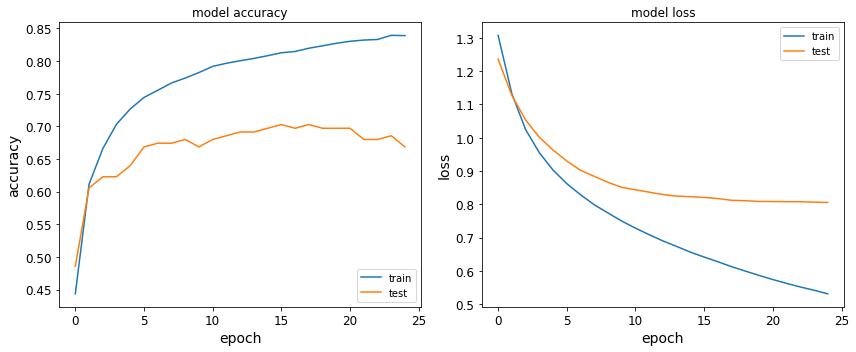

In [9]:
#--------------------------Impelment your code here:-------------------------------------

model_relu.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=AdamOpt)
history_1 = model_relu.fit(BaseX_train, BaseY_train, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(X_test, Y_test))

fig, axs = plt.subplots(1, 2, figsize=(12,5))

axs[0].plot(history_1.history['accuracy'])
axs[0].plot(history_1.history['val_accuracy'])
axs[0].set_title('model accuracy')
axs[0].set_ylabel('accuracy')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'test'], loc='lower right')

axs[1].plot(history_1.history['loss'])
axs[1].plot(history_1.history['val_loss'])
axs[1].set_title('model loss')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'test'], loc='upper right')

plt.tight_layout()
#----------------------------------------------------------------------------------------

---
<span style="color:red">***Task 2:***</span> *Activation functions.* 

Change the activation functions to LeakyRelu or tanh or sigmoid. Name the new model `new_a_model`. Explain how it can affect the model.*

---

In [38]:
#--------------------------Impelment your code here:-------------------------------------
keras.backend.clear_session()

new_a_model = Sequential(name="model_LeakyRelu")
new_a_model.add(Flatten(input_shape=(32,32,1)))

new_a_model.add(Dense(300, kernel_initializer='he_normal'))
new_a_model.add(LeakyReLU(alpha=0.01))                            

new_a_model.add(Dense(150, kernel_initializer='he_normal'))
new_a_model.add(LeakyReLU(alpha=0.01))

new_a_model.add(Dense(4, kernel_initializer='he_normal'))
new_a_model.add(Activation('softmax'))
#----------------------------------------------------------------------------------------

In [39]:
new_a_model.summary()

Model: "model_LeakyRelu"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               307500    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               45150     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 604       
_________________________________________________________________
activation (Activation)      (None, 4)             

---
<span style="color:red">***Task 3:***</span> *Number of epochs.* 

Train the new model using 25 and 40 epochs. What difference does it makes in term of performance? Remember to save the compiled model for having initialized weights for every run as we did in tutorial 12. Evaluate each trained model on the test set*

---

In [40]:
#Inputs: 
input_shape = (32,32,1)
learn_rate = 1e-5
decay = 0
batch_size = 64
epochs = 25

#Defining the optimizar parameters:
AdamOpt = Adam(lr=learn_rate,decay=decay)


Epoch 1/25
102/102 - 1s - loss: 1.3784 - accuracy: 0.3542 - val_loss: 1.2843 - val_accuracy: 0.4114
Epoch 2/25
102/102 - 1s - loss: 1.1549 - accuracy: 0.5670 - val_loss: 1.1785 - val_accuracy: 0.4857
Epoch 3/25
102/102 - 1s - loss: 1.0513 - accuracy: 0.6469 - val_loss: 1.1048 - val_accuracy: 0.5486
Epoch 4/25
102/102 - 1s - loss: 0.9839 - accuracy: 0.6881 - val_loss: 1.0504 - val_accuracy: 0.5714
Epoch 5/25
102/102 - 1s - loss: 0.9359 - accuracy: 0.7099 - val_loss: 1.0220 - val_accuracy: 0.5943
Epoch 6/25
102/102 - 1s - loss: 0.8981 - accuracy: 0.7278 - val_loss: 0.9797 - val_accuracy: 0.6114
Epoch 7/25
102/102 - 1s - loss: 0.8653 - accuracy: 0.7335 - val_loss: 0.9572 - val_accuracy: 0.6286
Epoch 8/25
102/102 - 1s - loss: 0.8372 - accuracy: 0.7481 - val_loss: 0.9300 - val_accuracy: 0.6400
Epoch 9/25
102/102 - 1s - loss: 0.8105 - accuracy: 0.7553 - val_loss: 0.9072 - val_accuracy: 0.6457
Epoch 10/25
102/102 - 1s - loss: 0.7859 - accuracy: 0.7648 - val_loss: 0.8904 - val_accuracy: 0.6629

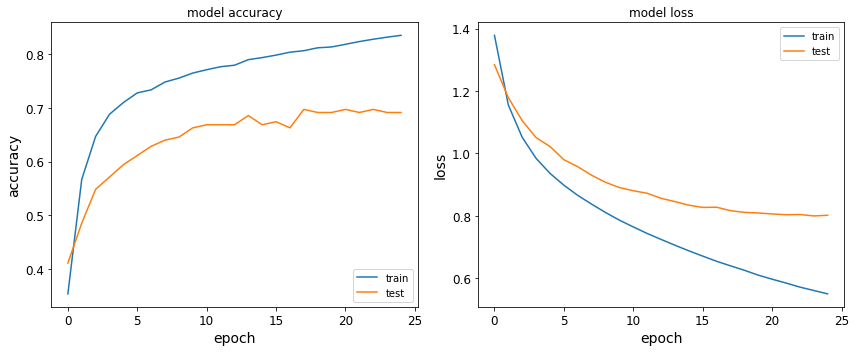

In [41]:
#--------------------------Impelment your code here:-------------------------------------

new_a_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=AdamOpt)

if not("results" in os.listdir()):
    os.mkdir("results")
save_dir = "results/"
model_name = "model_LeakyRelu.h5"
model_path = os.path.join(save_dir, model_name)
new_a_model.save(model_path)

history_2 = new_a_model.fit(BaseX_train, BaseY_train, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(X_test, Y_test))

fig, axs = plt.subplots(1, 2, figsize=(12,5))

axs[0].plot(history_2.history['accuracy'])
axs[0].plot(history_2.history['val_accuracy'])
axs[0].set_title('model accuracy')
axs[0].set_ylabel('accuracy')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'test'], loc='lower right')

axs[1].plot(history_2.history['loss'])
axs[1].plot(history_2.history['val_loss'])
axs[1].set_title('model loss')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'test'], loc='upper right')

plt.tight_layout()
#-----------------------------------------------------------------------------------------

In [44]:
#Inputs: 
input_shape = (32,32,1)
learn_rate = 1e-5
decay = 0
batch_size = 64
epochs = 40

#Defining the optimizar parameters:
AdamOpt = Adam(lr=learn_rate,decay=decay)


Epoch 1/40
102/102 - 1s - loss: 1.3658 - accuracy: 0.3723 - val_loss: 1.2702 - val_accuracy: 0.3886
Epoch 2/40
102/102 - 1s - loss: 1.1490 - accuracy: 0.5721 - val_loss: 1.1793 - val_accuracy: 0.4857
Epoch 3/40
102/102 - 1s - loss: 1.0491 - accuracy: 0.6423 - val_loss: 1.1003 - val_accuracy: 0.5429
Epoch 4/40
102/102 - 1s - loss: 0.9817 - accuracy: 0.6917 - val_loss: 1.0497 - val_accuracy: 0.5600
Epoch 5/40
102/102 - 1s - loss: 0.9338 - accuracy: 0.7138 - val_loss: 1.0181 - val_accuracy: 0.5886
Epoch 6/40
102/102 - 1s - loss: 0.8960 - accuracy: 0.7291 - val_loss: 0.9771 - val_accuracy: 0.6229
Epoch 7/40
102/102 - 1s - loss: 0.8617 - accuracy: 0.7425 - val_loss: 0.9473 - val_accuracy: 0.6457
Epoch 8/40
102/102 - 1s - loss: 0.8327 - accuracy: 0.7492 - val_loss: 0.9211 - val_accuracy: 0.6571
Epoch 9/40
102/102 - 1s - loss: 0.8066 - accuracy: 0.7593 - val_loss: 0.9039 - val_accuracy: 0.6629
Epoch 10/40
102/102 - 1s - loss: 0.7832 - accuracy: 0.7661 - val_loss: 0.8874 - val_accuracy: 0.6857

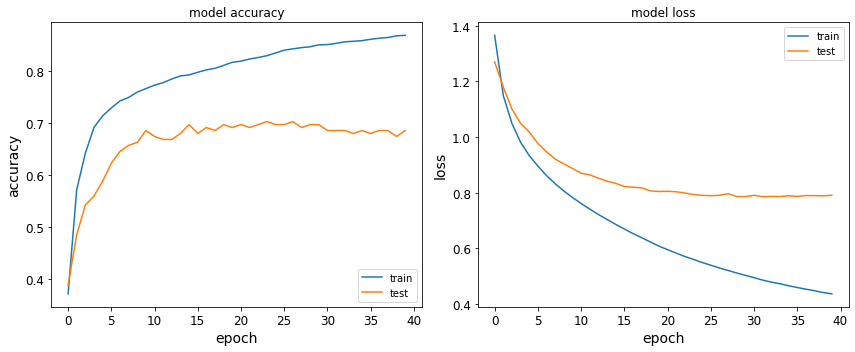

In [45]:
#--------------------------Impelment your code here:-------------------------------------
new_a_model = load_model(model_path) 

history_3 = new_a_model.fit(BaseX_train, BaseY_train, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(X_test, Y_test))

fig, axs = plt.subplots(1, 2, figsize=(12,5))

axs[0].plot(history_3.history['accuracy'])
axs[0].plot(history_3.history['val_accuracy'])
axs[0].set_title('model accuracy')
axs[0].set_ylabel('accuracy')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'test'], loc='lower right')

axs[1].plot(history_3.history['loss'])
axs[1].plot(history_3.history['val_loss'])
axs[1].set_title('model loss')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'test'], loc='upper right')

plt.tight_layout()
#-----------------------------------------------------------------------------------------

---
<span style="color:red">***Task 4:***</span> *Mini-batches.* 

Build the `model_relu` again and run it with a batch size of 32 instead of 64. What are the advantages of the mini-batch vs. SGD?*

---

In [46]:
keras.backend.clear_session()

In [47]:
#--------------------------Impelment your code here:-------------------------------------
model_relu = Sequential(name="model_relu")
model_relu.add(Flatten(input_shape=(32,32,1)))

model_relu.add(Dense(300, kernel_initializer='he_normal'))
model_relu.add(Activation('relu', name='Relu_1'))                            

model_relu.add(Dense(150, kernel_initializer='he_normal'))
model_relu.add(Activation('relu', name='Relu_2'))

model_relu.add(Dense(4, kernel_initializer='he_normal'))
model_relu.add(Activation('softmax'))
#----------------------------------------------------------------------------------------

In [48]:
batch_size = 32
epochs = 50

#Define your optimizar parameters:
AdamOpt = Adam(lr=learn_rate,decay=decay)


Epoch 1/50
203/203 - 1s - loss: 1.3055 - accuracy: 0.3761 - val_loss: 1.2237 - val_accuracy: 0.4800
Epoch 2/50
203/203 - 1s - loss: 1.0634 - accuracy: 0.6571 - val_loss: 1.0857 - val_accuracy: 0.5886
Epoch 3/50
203/203 - 1s - loss: 0.9585 - accuracy: 0.7017 - val_loss: 1.0059 - val_accuracy: 0.6171
Epoch 4/50
203/203 - 1s - loss: 0.8877 - accuracy: 0.7346 - val_loss: 0.9571 - val_accuracy: 0.6286
Epoch 5/50
203/203 - 1s - loss: 0.8323 - accuracy: 0.7561 - val_loss: 0.9149 - val_accuracy: 0.6343
Epoch 6/50
203/203 - 1s - loss: 0.7884 - accuracy: 0.7712 - val_loss: 0.8849 - val_accuracy: 0.6400
Epoch 7/50
203/203 - 1s - loss: 0.7501 - accuracy: 0.7864 - val_loss: 0.8635 - val_accuracy: 0.6800
Epoch 8/50
203/203 - 1s - loss: 0.7146 - accuracy: 0.7952 - val_loss: 0.8438 - val_accuracy: 0.6857
Epoch 9/50
203/203 - 1s - loss: 0.6847 - accuracy: 0.8003 - val_loss: 0.8361 - val_accuracy: 0.6743
Epoch 10/50
203/203 - 1s - loss: 0.6575 - accuracy: 0.8078 - val_loss: 0.8219 - val_accuracy: 0.6743

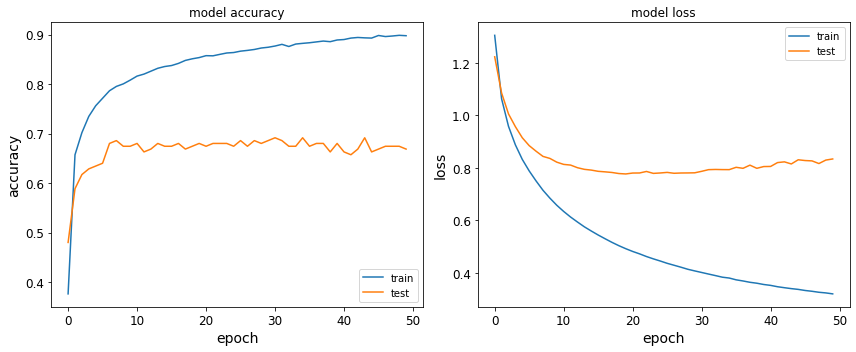

In [49]:
#--------------------------Impelment your code here:-------------------------------------
model_relu.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=AdamOpt)
history_4 = model_relu.fit(BaseX_train, BaseY_train, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(X_test, Y_test))

fig, axs = plt.subplots(1, 2, figsize=(12,5))

axs[0].plot(history_4.history['accuracy'])
axs[0].plot(history_4.history['val_accuracy'])
axs[0].set_title('model accuracy')
axs[0].set_ylabel('accuracy')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'test'], loc='lower right')

axs[1].plot(history_4.history['loss'])
axs[1].plot(history_4.history['val_loss'])
axs[1].set_title('model loss')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'test'], loc='upper right')

plt.tight_layout()
#----------------------------------------------------------------------------------------

---
<span style="color:red">***Task 5:***</span> *Batch normalization.* 

Build the `new_a_model` again and add batch normalization layers. How does it impact your results?*

---

In [61]:
keras.backend.clear_session()

In [62]:
#--------------------------Impelment your code here:-------------------------------------
new_a_model = Sequential(name="model_LeakyRelu")
new_a_model.add(Flatten(input_shape=(32,32,1)))

new_a_model.add(Dense(300, kernel_initializer='he_normal'))
new_a_model.add(BatchNormalization(axis=1))
new_a_model.add(LeakyReLU(alpha=0.01))                            

new_a_model.add(Dense(150, kernel_initializer='he_normal'))
new_a_model.add(BatchNormalization(axis=1))
new_a_model.add(LeakyReLU(alpha=0.01))

new_a_model.add(Dense(4, kernel_initializer='he_normal'))
new_a_model.add(Activation('softmax'))
#---------------------------------------------------------------------------------------

In [63]:
batch_size = 32
epochs = 50

#Define your optimizar parameters:
AdamOpt = Adam(lr=learn_rate,decay=decay)
#Compile the network: 
new_a_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=AdamOpt)

Epoch 1/50
203/203 - 1s - loss: 1.2153 - accuracy: 0.4886 - val_loss: 1.2250 - val_accuracy: 0.4114
Epoch 2/50
203/203 - 1s - loss: 0.8021 - accuracy: 0.7201 - val_loss: 1.0410 - val_accuracy: 0.6229
Epoch 3/50
203/203 - 1s - loss: 0.6532 - accuracy: 0.7924 - val_loss: 0.9407 - val_accuracy: 0.6457
Epoch 4/50
203/203 - 1s - loss: 0.5669 - accuracy: 0.8279 - val_loss: 0.9175 - val_accuracy: 0.6800
Epoch 5/50
203/203 - 1s - loss: 0.5102 - accuracy: 0.8457 - val_loss: 0.8841 - val_accuracy: 0.6629
Epoch 6/50
203/203 - 1s - loss: 0.4698 - accuracy: 0.8604 - val_loss: 0.8620 - val_accuracy: 0.6800
Epoch 7/50
203/203 - 1s - loss: 0.4387 - accuracy: 0.8693 - val_loss: 0.8587 - val_accuracy: 0.6857
Epoch 8/50
203/203 - 1s - loss: 0.4063 - accuracy: 0.8789 - val_loss: 0.8458 - val_accuracy: 0.6857
Epoch 9/50
203/203 - 1s - loss: 0.3880 - accuracy: 0.8806 - val_loss: 0.8452 - val_accuracy: 0.6800
Epoch 10/50
203/203 - 1s - loss: 0.3724 - accuracy: 0.8882 - val_loss: 0.8303 - val_accuracy: 0.6857

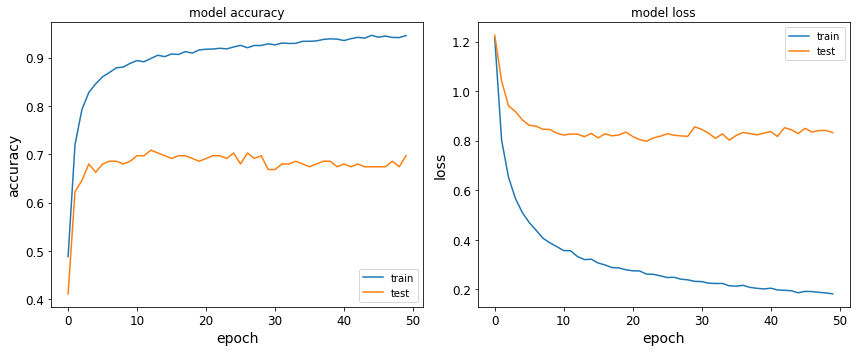

In [64]:
#Preforming the training by using fit 
#--------------------------Impelment your code here:-------------------------------------

history_5 = new_a_model.fit(BaseX_train, BaseY_train, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(X_test, Y_test))

fig, axs = plt.subplots(1, 2, figsize=(12,5))

axs[0].plot(history_5.history['accuracy'])
axs[0].plot(history_5.history['val_accuracy'])
axs[0].set_title('model accuracy')
axs[0].set_ylabel('accuracy')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'test'], loc='lower right')

axs[1].plot(history_5.history['loss'])
axs[1].plot(history_5.history['val_loss'])
axs[1].set_title('model loss')
axs[1].set_ylabel('loss')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'test'], loc='upper right')

plt.tight_layout()
#----------------------------------------------------------------------------------------

### PART 2: Convolutional Neural Network (CNN)
------------------------------------------------------------------------------------

---
<span style="color:red">***Task 1:***</span> *2D CNN.* 

Have a look at the model below and answer the following:
* How many layers does it have?
* How many filter in each layer?
* Would the number of parmaters be similar to a fully connected NN?
* Is this specific NN performing regularization?

---

In [65]:
def get_net(input_shape,drop,dropRate,reg):
    #Defining the network architecture:
    model = Sequential()
    model.add(Permute((1,2,3),input_shape = input_shape))
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',name='Conv2D_1',kernel_regularizer=regularizers.l2(reg)))
    if drop:
        model.add(Dropout(rate=dropRate))
    model.add(BatchNormalization(axis=1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu',name='Conv2D_2',kernel_regularizer=regularizers.l2(reg)))
    if drop:    
        model.add(Dropout(rate=dropRate))
    model.add(BatchNormalization(axis=1))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu',name='Conv2D_3',kernel_regularizer=regularizers.l2(reg)))
    if drop:
        model.add(Dropout(rate=dropRate))
    model.add(BatchNormalization(axis=1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu',name='Conv2D_4',kernel_regularizer=regularizers.l2(reg)))
    if drop:
        model.add(Dropout(rate=dropRate))
    model.add(BatchNormalization(axis=1))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu',name='Conv2D_5',kernel_regularizer=regularizers.l2(reg)))
    if drop:
        model.add(Dropout(rate=dropRate))
    model.add(BatchNormalization(axis=1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    #Fully connected network tail:      
    model.add(Dense(512, activation='elu',name='FCN_1')) 
    if drop:
        model.add(Dropout(rate=dropRate))
    model.add(Dense(128, activation='elu',name='FCN_2'))
    model.add(Dense(4, activation= 'softmax',name='FCN_3'))
    model.summary()
    return model

In [66]:
input_shape = (32,32,1)
learn_rate = 1e-5
decay = 1e-03
batch_size = 64
epochs = 25
drop = True
dropRate = 0.3
reg = 1e-2
keras.backend.clear_session()
NNet = get_net(input_shape,drop,dropRate,reg)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
permute (Permute)            (None, 32, 32, 1)         0         
_________________________________________________________________
Conv2D_1 (Conv2D)            (None, 32, 32, 64)        640       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
Conv2D_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 128)       0

In [67]:
from tensorflow.keras.optimizers import *
import os
from tensorflow.keras.callbacks import *

#Defining the optimizar parameters:
AdamOpt = Adam(lr=learn_rate,decay=decay)

#Compile the network: 
NNet.compile(optimizer=AdamOpt, metrics=['acc'], loss='categorical_crossentropy')

#Saving checkpoints during training:
# Checkpath = os.getcwd()
# Checkp = ModelCheckpoint(Checkpath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True, save_freq=1)

In [68]:
#Preforming the training by using fit 
# IMPORTANT NOTE: This will take a few minutes!
history_6 = NNet.fit(x=BaseX_train, y=BaseY_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0, validation_data = (BaseX_val, BaseY_val), shuffle=True)
#NNet.save(model_fn)

Epoch 1/25
102/102 [==============================] - 184s 2s/step - loss: 8.0816 - acc: 0.4231 - val_loss: 8.1017 - val_acc: 0.2500
Epoch 2/25
102/102 [==============================] - 185s 2s/step - loss: 7.6366 - acc: 0.5244 - val_loss: 8.3556 - val_acc: 0.2500
Epoch 3/25
102/102 [==============================] - 175s 2s/step - loss: 7.4775 - acc: 0.5695 - val_loss: 8.7045 - val_acc: 0.2500
Epoch 4/25
102/102 [==============================] - 183s 2s/step - loss: 7.3486 - acc: 0.6089 - val_loss: 8.6322 - val_acc: 0.2494
Epoch 5/25
102/102 [==============================] - 177s 2s/step - loss: 7.2681 - acc: 0.6339 - val_loss: 8.5210 - val_acc: 0.2610
Epoch 6/25
102/102 [==============================] - 185s 2s/step - loss: 7.1981 - acc: 0.6454 - val_loss: 8.3423 - val_acc: 0.2795
Epoch 7/25
102/102 [==============================] - 189s 2s/step - loss: 7.1256 - acc: 0.6727 - val_loss: 8.1726 - val_acc: 0.3160
Epoch 8/25
102/102 [==============================] - 175s 2s/step - 

In [69]:
# NNet.load_weights('Weights_1.h5')

In [70]:
results = NNet.evaluate(X_test,Y_test)
print('test loss, test acc:', results)

6/6 [==============================] - 1s 109ms/step - loss: 8.1704 - acc: 0.3429
test loss, test acc: [8.170429229736328, 0.34285715222358704]


---
<span style="color:red">***Task 2:***</span> *Number of filters* 

Rebuild the function `get_net` to have as an input argument a list of number of filters in each layers, i.e. for the CNN defined above the input should have been `[64, 128, 128, 256, 256]`. Now train the model with the number of filters reduced by half. What were the results.

---

In [72]:
#--------------------------Impelment your code here:-------------------------------------
def get_net(input_shape,hidden_dim,drop,dropRate,reg):
    #Defining the network architecture:
    model = Sequential()
    model.add(Permute((1,2,3),input_shape = input_shape))
    
    for i, h_dim in enumerate(hidden_dim):
        model.add(Conv2D(filters=h_dim, kernel_size=(3,3), padding='same', activation='relu',name='Conv2D_{}'.format(i),kernel_regularizer=regularizers.l2(reg)))
        if drop:
            model.add(Dropout(rate=dropRate))
        model.add(BatchNormalization(axis=1))
        if i%2==0:
            model.add(MaxPooling2D(pool_size=(2, 2)))
   
    model.add(Flatten())
    #Fully connected network tail:      
    model.add(Dense(512, activation='elu',name='FCN_1')) 
    if drop:
        model.add(Dropout(rate=dropRate))
    model.add(Dense(128, activation='elu',name='FCN_2'))
    model.add(Dense(4, activation= 'softmax',name='FCN_3'))
    model.summary()
    return model


hidden_dim = [32, 64, 64, 128, 128]
keras.backend.clear_session()
NNet_2 = get_net(input_shape,hidden_dim,drop,dropRate,reg)
NNet_2.compile(optimizer=AdamOpt, metrics=['acc'], loss='categorical_crossentropy')
history_7 = NNet_2.fit(x=BaseX_train, y=BaseY_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0, validation_data = (BaseX_val, BaseY_val), shuffle=True)
results = NNet_2.evaluate(X_test,Y_test)
print('test loss, test acc:', results)
#----------------------------------------------------------------------------------------

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
permute (Permute)            (None, 32, 32, 1)         0         
_________________________________________________________________
Conv2D_0 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
Conv2D_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0

That's all folks! See you :)